In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("/content/emplyee_performance.csv")
df.head()

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1
3,E004,Michelle Thomas,Other,Marketing,84044.55,18-11-2019,1
4,E005,Jessica Berg,Female,Marketing,92527.68,30-11-2019,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         50 non-null     object 
 1   Name               50 non-null     object 
 2   Gender             50 non-null     object 
 3   Department         50 non-null     object 
 4   Salary             50 non-null     float64
 5   JoinDate           50 non-null     object 
 6   PerformanceRating  50 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [27]:
df.describe()

,Salary,PerformanceRating
count,50.000000,50.000000
mean,74124.309400,3.000000
std,29097.609244,1.414214
min,30169.850000,1.000000
25%,50131.415000,2.000000
50%,74163.330000,3.000000
75%,98560.290000,4.000000
max,118604.450000,5.000000


In [28]:
df.isnull().sum()

,0
EmployeeID,0
Name,0
Gender,0
Department,0
Salary,0
JoinDate,0
PerformanceRating,0


In [29]:
df['JoinDate']=pd.to_datetime(df['JoinDate'])
df.tail()

/tmp/ipython-input-29-2175512555.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['JoinDate']=pd.to_datetime(df['JoinDate'])


,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
45,E046,Jessica Simpson,Other,Marketing,92032.36,2022-11-06,3
46,E047,Ashley Roberts,Female,Marketing,39129.79,2020-01-06,1
47,E048,Anthony Johns DVM,Female,Finance,34766.63,2022-05-22,2
48,E049,Laura Ellis,Male,HR,30169.85,2022-07-01,2
49,E050,Danielle George,Female,Sales,38314.97,2018-09-29,5


In [30]:
df['Salary']=pd.to_numeric(df['Salary'])
df.head()

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,2021-11-13,4
1,E002,Nichole Peterson,Female,Finance,31002.41,2015-07-02,5
2,E003,Paul Blair,Female,Sales,73663.33,2023-05-04,1
3,E004,Michelle Thomas,Other,Marketing,84044.55,2019-11-18,1
4,E005,Jessica Berg,Female,Marketing,92527.68,2019-11-30,3


In [31]:
df['Tenure']=2025-df['JoinDate'].dt.year


In [32]:
def salary_category(salary):
  if salary<50000:
    return 'Low'
  elif salary>50000 and salary<90000:
    return 'Medium'
  else:
    return 'High'
df['Salary_Category']=df['Salary'].apply(salary_category)
df.head()

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating,Tenure,Salary_Category
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,2021-11-13,4,4,High
1,E002,Nichole Peterson,Female,Finance,31002.41,2015-07-02,5,10,Low
2,E003,Paul Blair,Female,Sales,73663.33,2023-05-04,1,2,Medium
3,E004,Michelle Thomas,Other,Marketing,84044.55,2019-11-18,1,6,Medium
4,E005,Jessica Berg,Female,Marketing,92527.68,2019-11-30,3,6,High


In [33]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:")
print(avg_salary_by_dept)

Average Salary by Department:
Department
Finance      67804.804167
HR           79740.074286
IT           77536.544286
Marketing    79803.912500
Sales        69497.878333
Name: Salary, dtype: float64


In [34]:
gender_count_by_dept = df.groupby(['Department', 'Gender']).size()
print("Employee Count by Gender and Department:")
print(gender_count_by_dept)

Employee Count by Gender and Department:
Department  Gender
Finance     Female    4
            Male      6
            Other     2
HR          Female    5
            Male      1
            Other     1
IT          Female    4
            Male      2
            Other     1
Marketing   Female    3
            Male      5
            Other     4
Sales       Female    7
            Male      3
            Other     2
dtype: int64


In [35]:
avg_rating_by_dept=df.groupby('Department')['PerformanceRating'].mean()
print("Average Performance Rating by Department:")
print(avg_rating_by_dept)

Average Performance Rating by Department:
Department
Finance      2.416667
HR           3.142857
IT           3.714286
Marketing    3.166667
Sales        2.916667
Name: PerformanceRating, dtype: float64


In [36]:
low_performers=df[df['PerformanceRating']<=2]
print("Employees with Low Performance Rating:")
print(low_performers)

Employees with Low Performance Rating:
   EmployeeID               Name  Gender Department     Salary   JoinDate  \
2        E003         Paul Blair  Female      Sales   73663.33 2023-05-04   
3        E004    Michelle Thomas   Other  Marketing   84044.55 2019-11-18   
12       E013        Louis Hicks    Male      Sales  118091.53 2022-12-04   
13       E014     Sheila Winters  Female      Sales   99976.18 2023-01-07   
14       E015     Richard Santos  Female         HR   94509.68 2023-04-10   
17       E018       Roger Dennis  Female         IT  115486.28 2019-04-17   
24       E025       Ashley Heath    Male    Finance   38102.06 2015-08-12   
26       E027      Matthew Davis    Male  Marketing   74667.93 2017-01-16   
27       E028      Melissa Chang    Male    Finance  118604.45 2017-02-11   
28       E029   Chelsea Shepherd  Female    Finance   46971.69 2016-03-09   
29       E030       John Carroll   Other         IT   49346.99 2022-04-20   
31       E032        David Lynch  Fem

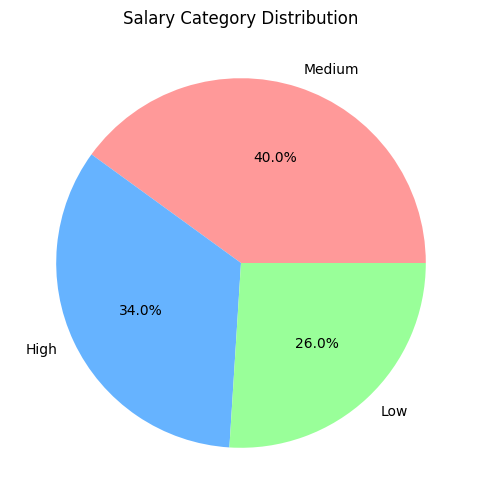

In [40]:
plt.figure(figsize=(6, 6))
df['Salary_Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Salary Category Distribution")
plt.ylabel('')
plt.show()

In [43]:
with pd.ExcelWriter("employee_analysis_result.xlsx") as writer:
    df.to_excel(writer, sheet_name="CleanedData", index=False)
    avg_salary_by_dept.to_excel(writer, sheet_name="AvgSalaryByDept", index=False)
    gender_count_by_dept.to_excel(writer, sheet_name="GenderCountByDept", index=False)
    avg_rating_by_dept.to_excel(writer, sheet_name="AvgRatingByDept", index=False)
    low_performers.to_excel(writer, sheet_name="LowPerformers", index=False)